# WGAN-GP Training


## imports


In [1]:
import numpy as np
import tensorflow as tf
import pickle
from utils.loaders import load_dataset
from models.WGANGP import WGANGP
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'dataset128'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode = 'load'  # 'load' #


## data


In [3]:
BATCH_SIZE = 16
IMAGE_SIZE = 128


In [4]:
x_train = load_dataset(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)


Found 20000 images belonging to 1 classes.
128


In [5]:
x_train[0][0][0]


array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]], dtype=float32)

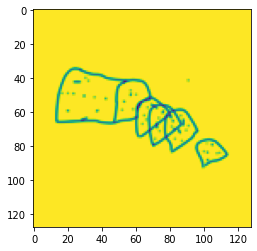

In [6]:
plt.imshow((x_train[0][0][0].squeeze()))


## architecture


In [7]:
gan = WGANGP(input_dim=(IMAGE_SIZE, IMAGE_SIZE, 1), critic_conv_filters=[128, 256, 512, 1024], critic_conv_kernel_size=[5, 5, 5, 5], critic_conv_strides=[2, 2, 2, 2], critic_batch_norm_momentum=None, critic_activation='leaky_relu', critic_dropout_rate=None, critic_learning_rate=0.0002, generator_initial_dense_layer_size=(8, 8, 512), generator_upsample=[1, 1, 1, 1], generator_conv_filters=[512, 256, 128, 1], generator_conv_kernel_size=[5, 5, 5, 5], generator_conv_strides=[2, 2, 2, 2], generator_batch_norm_momentum=0.9, generator_activation='leaky_relu', generator_dropout_rate=None, generator_learning_rate=0.0002, optimiser='adam', grad_weight=10, z_dim=100, batch_size=BATCH_SIZE
             )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
(128, 128, 1)


In [8]:
gan.critic.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 128, 128, 1)]     0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  3328      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  3277312   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                  0     

In [9]:
gan.generator.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32768)             3309568   
_________________________________________________________________
batch_normalization (BatchNo (None, 32768)             131072    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32768)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 16, 16, 512)       6554112   
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 512)       2048

## training


In [10]:
EPOCHS = 30001
PRINT_EVERY_N_BATCHES = 500
N_CRITIC = 5
BATCH_SIZE = 16


In [11]:
gan.train(
    x_train, batch_size=BATCH_SIZE, epochs=EPOCHS, run_folder=RUN_FOLDER, print_every_n_batches=PRINT_EVERY_N_BATCHES, n_critic=N_CRITIC, using_generator=True
)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
0 (5, 1) [D loss: (-9.4)(R -15.6, F 4.3, G 0.2)] [G loss: -3.9]
1 (5, 1) [D loss: (-8.7)(R -7.9, F -2.9, G 0.2)] [G loss: 1.3]
2 (5, 1) [D loss: (-8.5)(R -10.9, F 1.6, G 0.1)] [G loss: -3.2]
3 (5, 1) [D loss: (-10.1)(R -18.0, F 5.1, G 0.3)] [G loss: -4.0]
4 (5, 1) [D loss: (-9.6)(R -6.4, F -5.1, G 0.2)] [G loss: 4.2]
5 (5, 1) [D loss: (-9.7)(R -14.7, F 3.9, G 0.1)] [G loss: -6.2]
6 (5, 1) [D loss: (-7.3)(R -20.1, F 8.7, G 0.4)] [G loss: -5.5]
7 (5, 1) [D loss: (-9.3)(R -11.1, F -0.6, G 0.2)] [G loss: 1.8]
8 (5, 1) [D loss: (-9.0)(R -14.5, F 3.9, G 0.2)] [G loss: -3.3]
9 (5, 1) [D loss: (-9.9)(R -12.6, F 1.2, G 0.1)] [G loss: -2.3]
10 (5, 1) [D loss: (-8.7)(R -11.1, F 1.5, G 0.1)] [G loss: -3.3]
11 (5, 1) [D loss: (-9.4)(R -13.3, F 2.3, G 0.2)] [G loss: -5.5]
12 (5, 1) [D loss: (-8.3)(R -7.5, F -3.2, G 0.2)] [G loss: 0.2]
13 (5, 1) [D loss: (-8.1)(R -13.3, F 3.3, G 0.2)] [G loss: -1.8]
14 (5, 1

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()


Make gif of data


In [ ]:
""" from IPython.display import Image
import imageio
import glob

out_file = 'generated_data.gif'

with imageio.get_writer(out_file, mode='I', duration=0.3) as writer:
    file_names = glob.glob('images_gif/*.png')
    file_names = sorted(file_names)
    last = -1

    for i, file_name in enumerate(file_names):
        animated_image = imageio.imread(file_name)
        writer.append_data(animated_image)

    animated_image = imageio.imread(file_name)
    writer.append_data(animated_image)

Image(open('generated_data.gif', 'rb').read()) """
